In [1]:
# imports 

# make notebook span full width of window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline

import os
path_base = os.getcwd().split('Dragonfly44_SFH')[0] + "Dragonfly44_SFH/" # hack, but works
path_fits = path_base+ "fitting/output/fits/"

path_data = path_base+ "data/"
file_data = path_data+"DF44/obs_phot_specKCWI_sigma110.h5"

import numpy as np

from Dragonfly44_SFH.utils import prospect_io, plotting
from figure_style import *

In [2]:
# contains filenames of Prospector output
from Dragonfly44_SFH.fitting.output.fits.fits_DF44_summary import *

result_file1 = path_fits+ fit_aD1_phot_specKCWI
label1 = 'Spectrum and Photometry'

result_file2 = path_fits+ fit_aD1_specKCWI
label2 = 'Spectrum only (fixed mass)'

result_file3 = path_fits+ fit_aD1_phot
label3 = 'Photometry only'

result1, obs1, model1 = prospect_io.read_results( result_file1, file_data=file_data )
result2, obs2, model2 = prospect_io.read_results( result_file2, file_data=file_data )
result3, obs3, model3= prospect_io.read_results( result_file3, file_data=file_data )

zobs = float(model1.params['zred'])
zobs = 0 # plot in observed frame

label0 = "Observations:" # label which related to label1, label2

Caution: No logmass or massmet/massmet_1 or total_mass parameter!


In [3]:
# setup styling

obs_params1 = {'marker':'o', 'color':'k', 'ms':20}
obs_params2 = {'marker':'o', 'color':'k', 'ms':1}
obs_params3 = {'marker':'o', 'color':'k', 'ms':1}

posts_params1={'color':'#f51218ff'}
posts_params2={'color':'None'}
posts_params3={'color':'#f0d200ff'}


text_params1={'color':'#f51218ff'}
text_params2={'color':'#38cb91ff'}
text_params3={'color':'#c3b05fff'}

bestfit_params1={'lw':1, 'color':'#f51218ff', 'marker':'D', 's':160, 'label':'Bestfit Spec+Phot' }
bestfit_params2={'lw':2.4, 'color':'#38cb91ff', 'marker':'s', 's':120, 'label':'Bestfit Spec' }
bestfit_params3={'lw':1.2, 'color':'#f0d200ff', 'marker':'v', 's':120, 'label':'Bestfit Phot' }

plot_params1 = dict( obs=obs1, result=result1, zobs=zobs, label="", text_params=text_params1,
                     obs_params=obs_params1, posts_params=posts_params1, bestfit_params=bestfit_params1 )

plot_params2 = dict( obs=obs2, result=result2, zobs=zobs, label="", text_params=text_params2,
                     obs_params=obs_params2, posts_params=posts_params2, bestfit_params=bestfit_params2 )

plot_params3 = dict( obs=obs3, result=result3, zobs=zobs, label="", text_params=text_params3,
                     obs_params=obs_params3, posts_params=posts_params3, bestfit_params=bestfit_params3 )


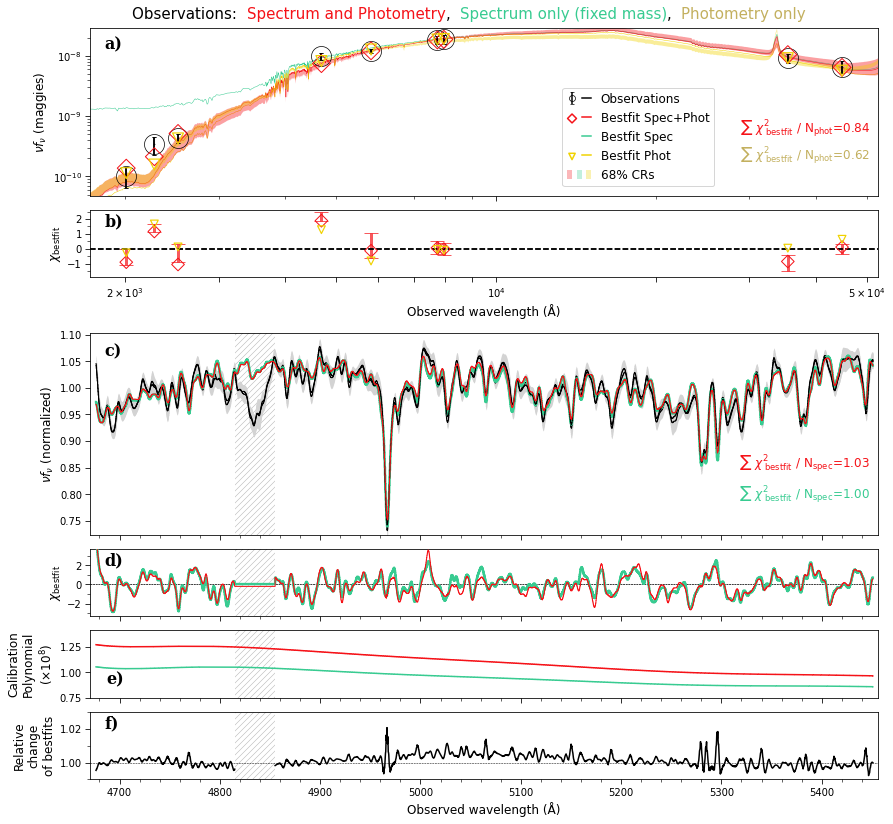

In [4]:

fig = plotting.compare_two_fits( plot_params2, plot_params1, zobs=zobs, 
                                return_fig=True, figsize=( fig_width_two, 0.73*textheight), 
                                reverse_order=True)
fig = plotting.plot_obs_and_fits( fig=fig, return_fig=True, axes=fig.get_axes()[:2], plot_legend=False, 
                                 show_chi2s=False, **plot_params3 )

axes = fig.get_axes()
ax_phot,ax_rphot,_,ax_spec,ax_rspec,ax_pspec,ax_cspec = axes

[ ax.set_xlim(1.8e3,5.5e4) for ax in [ax_phot,ax_rphot]] # see log xlabels
ax_phot.set_ylim(5e-11, 3e-8)
ax_pspec.set_ylim(0.8,1.5)
ax_rspec.set_ylim(-3,4)
ax_cspec.set_ylim(0.992,1.013)

if True: # panel labels
    ann_params = dict( xy=(0,0), xytext=(0.018,0.95),xycoords="axes fraction", ha="left", va="top", fontsize=16, family="serif", weight="bold" )
    ax_phot.annotate("a)", **ann_params)
    ax_rphot.annotate("b)", **ann_params)
    ax_spec.annotate("c)", **ann_params)
    ax_rspec.annotate("d)", **ann_params)    
    ax_cspec.annotate("f)", **ann_params)  
    
    ann_params['xytext'] = (0.02,0.4)
    ax_pspec.annotate("e)", **ann_params)    

if True: # top legend
    ax_legend = ax_phot
    l1a = ax_legend.errorbar([-1],[-1], yerr=[1], color='k', mec='k', mfc='None', fmt=' ', capsize=2, ms=12, marker='o', mew=0.7)
    l1b, = ax_legend.plot([],[], color='k')
    l2a = ax_legend.scatter([],[], edgecolor=bestfit_params1['color'], facecolor='None', marker=bestfit_params1['marker'], zorder=2, s=160, lw=1.5, )
    l2b, = ax_legend.plot([],[], color=bestfit_params1['color'])
    l3a = ax_legend.scatter([],[], edgecolor=bestfit_params2['color'], facecolor='None', marker=bestfit_params2['marker'], zorder=2, s=0, lw=1.5, )
    l3b, = ax_legend.plot([],[], color=bestfit_params2['color'])
    l4a = ax_legend.scatter([],[], edgecolor=bestfit_params3['color'], facecolor='None', marker=bestfit_params3['marker'], zorder=2, s=160, lw=1.5, )
    l4b, = ax_legend.plot([],[], color=bestfit_params3['color'])
    l5 = ax_legend.fill_between([],[], lw=0, color=bestfit_params1['color'], alpha=0.3)
    l6 = ax_legend.fill_between([],[], lw=0, color=bestfit_params2['color'], alpha=0.3)
    l7 = ax_legend.fill_between([],[], lw=0, color=bestfit_params3['color'], alpha=0.3)
    
    handles = [(l1a,l1b),(l2a,l2b),(l3a,l3b),(l4a,l4b),(l5,l6,l7)]
    labels = ['Observations','Bestfit Spec+Phot','Bestfit Spec','Bestfit Phot',"68% CRs"]
    ax_legend.legend( handles,  labels,
                      numpoints=1, loc=4, markerscale=0.5, 
                      handler_map={tuple: HandlerTuple(ndivide=None)}, 
                      bbox_to_anchor=[0.8,0.02],
                    )

if True: # annotations 

    annparams = dict( fontsize=15 )   
    string_list = [ label0+'  ', label1, ',  ', label2, ',  ', label3]
    scolor_list = ['k',text_params1['color'],'k', text_params2['color'],'k', text_params3['color']]
    x0,y0 = 2065.6379980402544, 4.120631527856962e-08
    plotting.multicolor_text( axes[0], fig, x0,y0, string_list, scolor_list, **annparams )
    
if True: # log xlabels
    xlim, xticks, xticks_m = ax_rphot.get_xlim(), ax_rphot.get_xticks(), ax_rphot.get_xticks(minor=True)
    xticks = np.sort( np.append( ax_rphot.get_xticks(), ax_rphot.get_xticks(minor=True) ) )
    xticks = xticks[ (xlim[0]<=xticks) & (xticks<xlim[-1])]
    ax_rphot.set_xticks( xticks )
    # [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 20., 30., 40., 50.]
    xticklabels = [r"$2\times10^3$", "", "", "", "", "", "", "", r"$10^4$", "", "", "", r"$5\times10^4$",  ]
    ax_rphot.set_xticklabels( xticklabels )    
    
if True: # chi2 labels
    x_ann=0.99
    y_ann_phot=0.3
    dy_ann_phot=0.16
    y_ann_spec=0.25
    dy_ann_spec=0.15
    params_ann = {"xycoords":"axes fraction", "xy":(0,0), "fontsize":12, "va":"top", "ha":"right"}

    for i, pp in enumerate([plot_params1,plot_params3]):
        if pp['obs']['maggies'] is not None: # phot
            y, ey, mask = [ np.copy( pp['obs'][key] ) 
                            for key in [ "maggies","maggies_unc","phot_mask" ]]
            ybf = pp['result']['draws']['bestfit']['photometry']
            chi = (y-ybf)/ey
            rchi2 = np.sum( chi[mask]**2 ) / np.sum( mask ).astype(float)

            label = r"$\sum ~\chi_\mathrm{~bestfit}^2~/~\mathrm{N}_\mathrm{phot}$="+"{:.2f}".format( rchi2 )
            ax_phot.annotate(label, xytext=( x_ann, y_ann_phot-dy_ann_phot*(i-1)), 
                             color=pp['text_params']['color'], **params_ann)
        
    for i, pp in enumerate([plot_params1,plot_params2]):
        if pp['obs']['spectrum'] is not None: # spec
            y, ey, mask = [ np.copy( pp['obs'][key] ) 
                            for key in [ "spectrum","unc","mask" ]]
            ybf = pp['result']['draws']['bestfit']['spectrum']
            chi = (y-ybf)/ey
            rchi2 = np.sum( chi[mask]**2 ) / np.sum( mask ).astype(float)

            label = r"$\sum ~\chi_\mathrm{~bestfit}^2~/~\mathrm{N}_\mathrm{spec}$="+"{:.2f}".format( rchi2 )
            ax_spec.annotate(label, xytext=( x_ann, y_ann_spec-dy_ann_spec*(i-1)), 
                             color=pp['text_params']['color'], **params_ann)
            
        
if True: # masked regions
    for ax in [ax_spec,ax_rspec,ax_pspec,ax_cspec]:
        x, mask = [ np.copy(obs1[k]) for k in ['wavelength','mask'] ]
        x /= (1+zobs)
        ylim = ax.get_ylim()
#                     primt( ylim )
        ax.fill_between( [ x[~mask][0], x[~mask][-2] ], y1=-100, y2=100,  \
                         color='None', lw=0, edgecolor="0.7", hatch='////', zorder=-10)
        ax.set_ylim( ylim )
             
if True: # plot params 
    fig.subplots_adjust( hspace=0.15 )    
    
    for ax in [ax_phot, ax_rphot]:
        ax.set_xlim( 1721.3649983668786, 52371.290802862815 )
    ax_phot.set_ylim( 4.7780829349257965e-11, 2.943308234183544e-08 )
    
    ax_rphot.set_yticks( np.arange(-2,4,1))
    ax_rphot.set_yticks( np.arange(-2,4,0.5), minor=True)
    ax_rphot.set_ylim( -1.9,2.6 )  
    
    xticklabels = ['4700', '4800', '4900', '5000', '5100', '5200', '5300', '5400']
    for ax in [ax_spec,ax_rspec,ax_pspec,ax_cspec]:
        ax.set_xlim( (4676/(1.+zobs)-5,5451/(1.+zobs)+5) )
        ax.set_xticks( [float(x) for x in xticklabels] )
    axes[-1].set_xticklabels( xticklabels )
        
    ax_rspec.set_yticks( np.arange(-4,4,2))
    ax_rspec.set_yticks( np.arange(-4,4,1), minor=True)
    ax_rspec.set_ylim(-3.3,3.7)
    
    ax_pspec.set_ylim(0.75,1.41) 
    
    ax_cspec.set_yticks( np.arange(0.9,1.1,0.02) )
    ax_cspec.set_yticks( np.arange(0.9,1.1,0.01), minor=True )
    ax_cspec.set_ylim(0.99,1.03)

    
plt.savefig('figures/figB2.pdf', **saveparams)
plt.show()

